In [ ]:
%pip install pandas
import pandas as pd

df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter='\t', engine='python')

# Check dimensions and structure
print(df.shape)
print(df.info())


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


(1000098, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Non-Null Count    Dtype 
---  ------                                                                                                                                                                                            

In [6]:
# Split the single column into multiple columns using '|' as the delimiter
df = df[df.columns[0]].str.split('|', expand=True)

# Set the correct column names from the header row in the file
df.columns = [
	'UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims'
]

# Now you can describe the selected columns (convert to numeric first)
df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]] = df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].apply(pd.to_numeric, errors='coerce')
df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].describe()


,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07


In [7]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df.dtypes


UnderwrittenCoverID                 object
PolicyID                            object
TransactionMonth            datetime64[ns]
IsVATRegistered                     object
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                          object
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                              object
VehicleType                         object
RegistrationYear                    object
make                                object
Model                               object
Cylinders  

In [8]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])


CustomValueEstimate    779642
dtype: int64


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/108.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/108.7 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.7 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.7 kB ? eta -:--:--
     ---------- -------------------------- 30.7/108.7 kB 187.9 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/108.7 kB 196.9 kB/s eta 0:00:01
     --------------------------- --------- 81.9/108.7 kB 328.8 kB/s eta 0:00:01
     --------------------------------- -- 102.4/108.7 kB 368.6 kB/s eta 0:00:01
     ------------------------------------ 108.7/108.7 kB 332.8 kB/s eta 0:00:00
  Using cached kiwisolver-


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


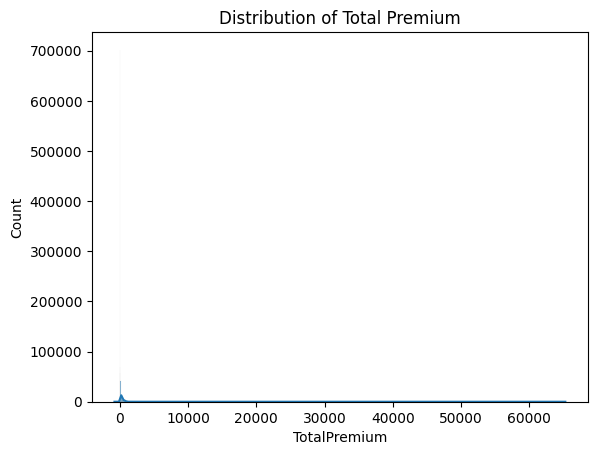

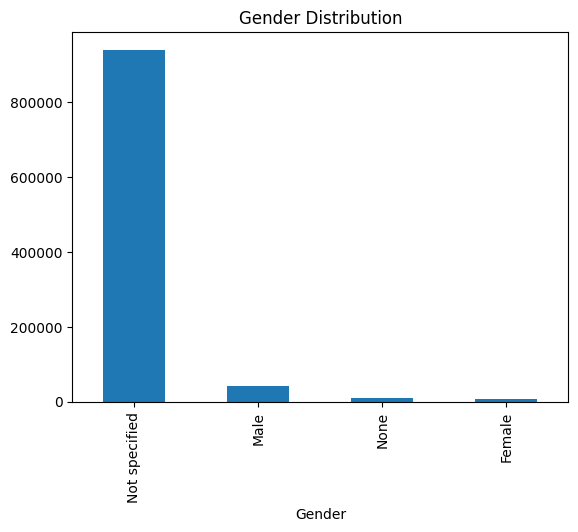

In [11]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
sns.histplot(df["TotalPremium"], kde=True)
plt.title("Distribution of Total Premium")
plt.show()

# Bar chart for categorical
df["Gender"].value_counts().plot(kind='bar', title="Gender Distribution")
plt.show()


In [12]:
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]


c:\Users\rebika\Desktop\acis-claim-risk-analysis\venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\rebika\Desktop\acis-claim-risk-analysis\venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


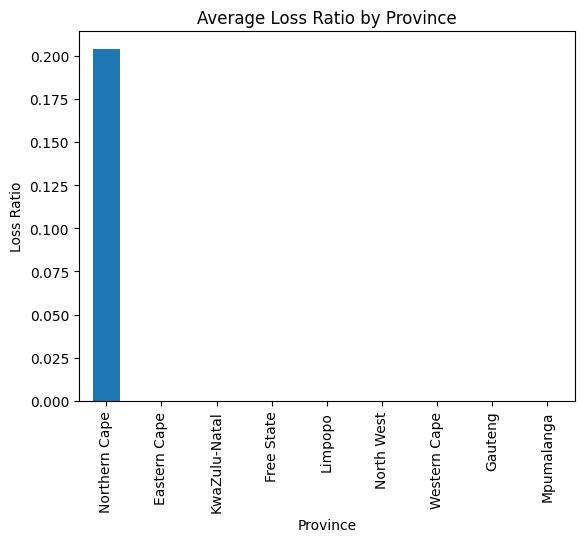

In [13]:
loss_by_province = df.groupby("Province")["LossRatio"].mean().sort_values()
loss_by_province.plot(kind='bar', title="Average Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.show()


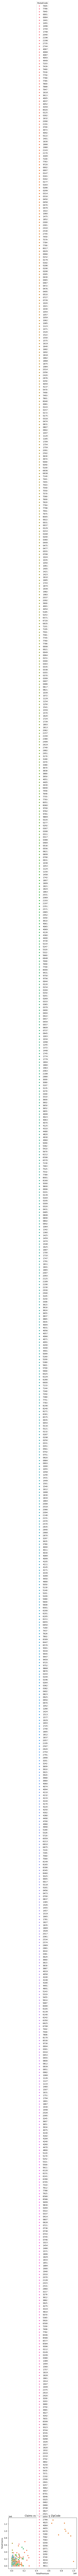

In [14]:
monthly = df.groupby(["TransactionMonth", "PostalCode"]).agg({
    "TotalClaims": "sum",
    "TotalPremium": "sum"
}).reset_index()

monthly["LossRatio"] = monthly["TotalClaims"] / monthly["TotalPremium"]

sns.scatterplot(data=monthly, x="TotalPremium", y="TotalClaims", hue="PostalCode")
plt.title("Claims vs Premium by ZipCode")
plt.show()


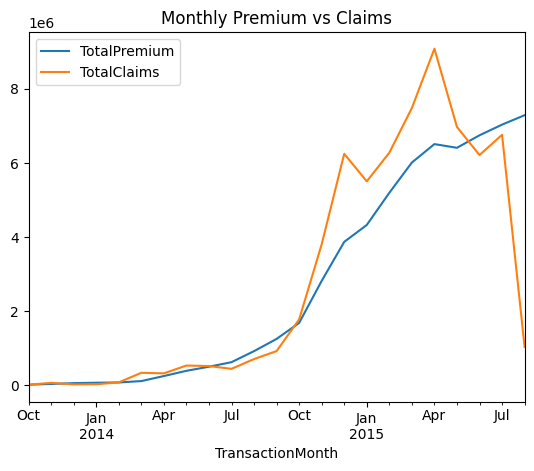

In [15]:
monthly_trend = df.groupby("TransactionMonth")[["TotalPremium", "TotalClaims"]].sum().reset_index()

monthly_trend.plot(x="TransactionMonth", y=["TotalPremium", "TotalClaims"], title="Monthly Premium vs Claims")
plt.show()


In [17]:
vehicle_risk = df.groupby("make")[["TotalClaims", "TotalPremium"]].sum()
vehicle_risk["LossRatio"] = vehicle_risk["TotalClaims"] / vehicle_risk["TotalPremium"]
vehicle_risk = vehicle_risk.sort_values("LossRatio", ascending=False)

print(vehicle_risk.head(10))  # High-risk
print(vehicle_risk.tail(10))  # Low-risk


                                      TotalClaims   TotalPremium  LossRatio
make                                                                       
SUZUKI                               1.712109e+05   27012.567538   6.338194
JMC                                  2.300218e+04    5635.786282   4.081449
HYUNDAI                              4.533079e+05  113615.556013   3.989840
POLARSUN                             1.251978e+05   41029.401996   3.051418
MARCOPOLO                            7.996535e+03    2665.651421   2.999843
AUDI                                 1.021004e+06  376274.319824   2.713456
BMW                                  4.814972e+05  242765.243528   1.983386
B.A.W                                2.871375e+05  166044.014668   1.729285
IVECO                                7.558930e+05  526126.238510   1.436714
CMC                                  1.323616e+06  957445.999590   1.382444
                                     TotalClaims  TotalPremium  LossRatio
make          

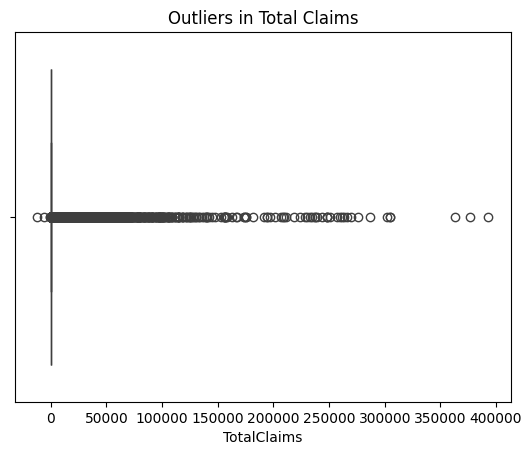

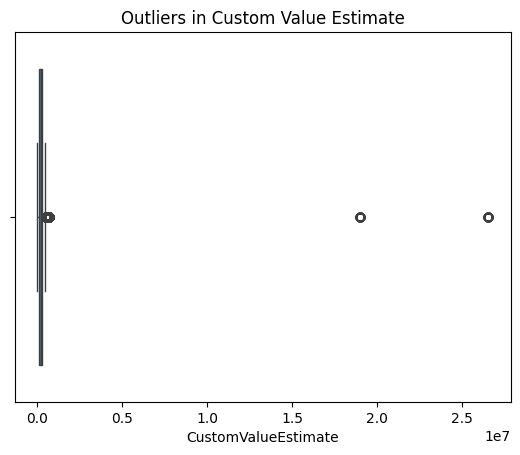

In [18]:
sns.boxplot(x=df["TotalClaims"])
plt.title("Outliers in Total Claims")
plt.show()

sns.boxplot(x=df["CustomValueEstimate"])
plt.title("Outliers in Custom Value Estimate")
plt.show()


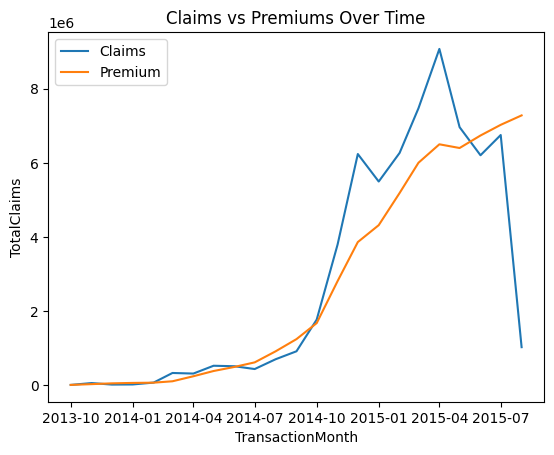

In [19]:
sns.lineplot(data=monthly_trend, x="TransactionMonth", y="TotalClaims", label="Claims")
sns.lineplot(data=monthly_trend, x="TransactionMonth", y="TotalPremium", label="Premium")
plt.title("Claims vs Premiums Over Time")
plt.show()


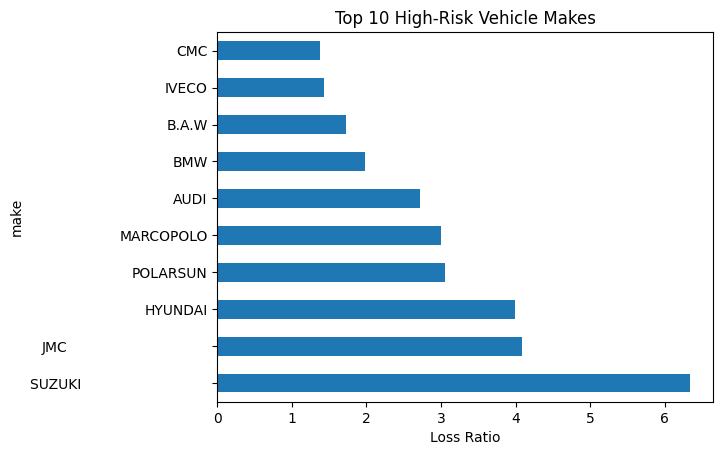

In [20]:
vehicle_risk.head(10)["LossRatio"].plot(kind="barh", title="Top 10 High-Risk Vehicle Makes")
plt.xlabel("Loss Ratio")
plt.show()


In [22]:
%pip install scipy
from scipy.stats import ttest_ind

male_loss = df[df["Gender"] == "Male"]["LossRatio"].dropna()
female_loss = df[df["Gender"] == "Female"]["LossRatio"].dropna()

stat, p_value = ttest_ind(male_loss, female_loss)
print(f"T-test p-value: {p_value}")



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl (41.0 MB)
Note: you may need to restart the kernel to use updated packages.
T-test p-value: nan


c:\Users\rebika\Desktop\acis-claim-risk-analysis\venv\Lib\site-packages\scipy\stats\_stats_py.py:6154: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
c:\Users\rebika\Desktop\acis-claim-risk-analysis\venv\Lib\site-packages\scipy\stats\_stats_py.py:6707: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1 - m2
